# Netflix EDA
## 主題和簡介

本報告旨在透過對Netflix的數據分析，探究其內容與市場趨勢。動機源於希望研究與日常生活緊密相連的主題。Netflix作為全球領先的串流媒體服務供應商，其豐富的內容和獨特的經營策略對當代文化產生了深遠影響。我們將分析Netflix的內容類型、發行時間、評級和國家製作等方面的趨勢，旨在提供對Netflix更全面的了解。

## 資料觀察與前處理

In [1]:
import pandas as pd
netflix_data = pd.read_csv("netflix_titles.csv")

# Display the first few rows of the dataframe 觀察資料
netflix_data.head(-5)
#netflix_data.shape

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [3]:
# 處理空值
basic_info = netflix_data.info()
missing_values = netflix_data.isnull().sum()

# 1. For 'director', 'cast', and 'country', we will replace NaN with 'Unknown'.
# 2. For 'date_added', we will remain NaN as it is.
# 3. For 'rating' and 'duration', we will also replace NaN with the most frequent value in each column.

# Replacing NaN values for 'director', 'cast', and 'country'
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)


# Replacing NaN values for 'rating', and 'duration'
most_common_rating = netflix_data['rating'].mode()[0]
netflix_data['duration'].fillna("0 min",inplace=True)

netflix_data['rating'].fillna(most_common_rating, inplace=True)

# Checking the dataset after handling missing values
updated_missing_values = netflix_data.isnull().sum()

missing_values, updated_missing_values





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(show_id          0
 type             0
 title            0
 director         0
 cast             0
 country          0
 date_added      10
 release_year     0
 rating           0
 duration         0
 listed_in        0
 description      0
 dtype: int64,
 show_id          0
 type             0
 title            0
 director         0
 cast             0
 country          0
 date_added      10
 release_year     0
 rating           0
 duration         0
 listed_in        0
 description      0
 dtype: int64)

## 資料視覺化

在本報告中，我們對收集到的數據進行了視覺化處理，以便更直觀地展示Netflix的數據特徵。包括Netflix內容的種類、發行時間、評級和製作國家等關鍵指標。這種視覺化的方法不僅使數據更易於理解，也有助於揭示數據中的潛在趨勢。以下將展示四個基本資料最為範例。


/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/3269299771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values,palette="Greens_r")


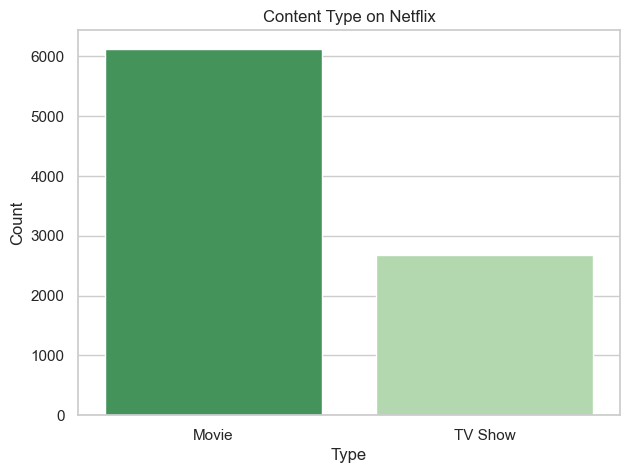

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# 統計電影和電視劇的數量
type_counts = netflix_data['type'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=type_counts.index, y=type_counts.values,palette="Greens_r")
plt.title('Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

type_counts


/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/1973918957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index,palette="Blues_r")


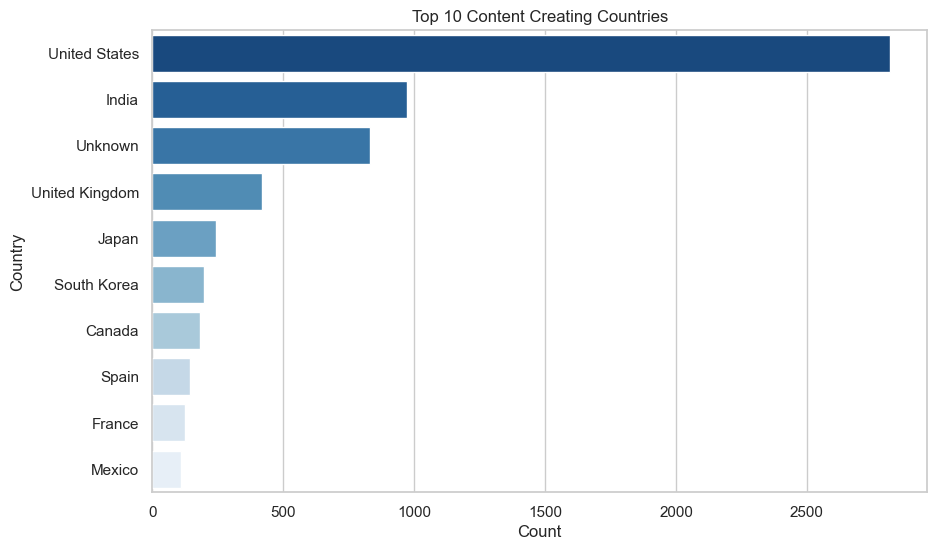

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [6]:
# 統計各個國家製作的節目數量
country_counts = netflix_data['country'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index,palette="Blues_r")
plt.title('Top 10 Content Creating Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

country_counts


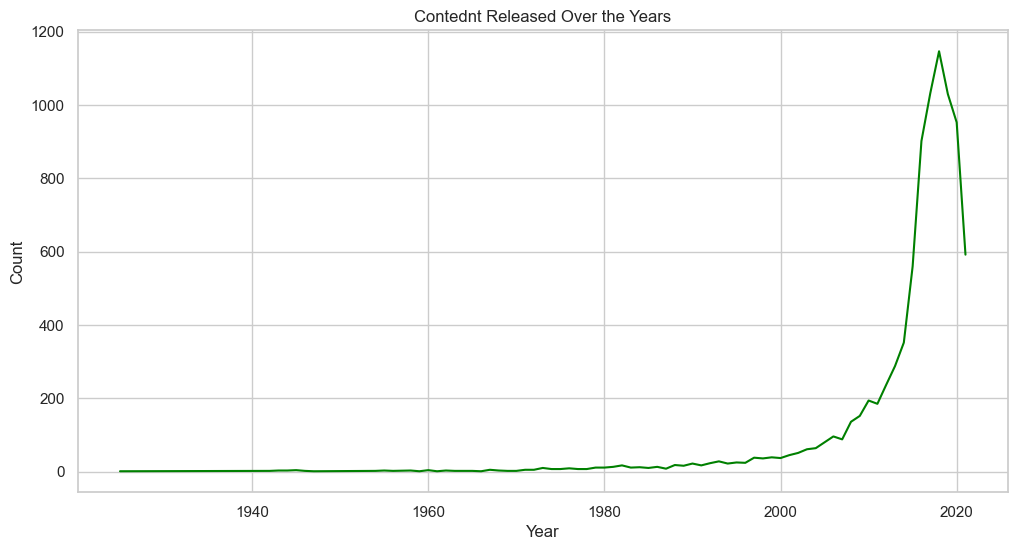

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

In [8]:
# 統計不同年份的節目發行量
release_year_counts = netflix_data['release_year'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values,color="green" )
plt.title('Contednt Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

release_year_counts.tail(10)  #顯示最近10年的發行量


/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/1170011694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values,palette="coolwarm")


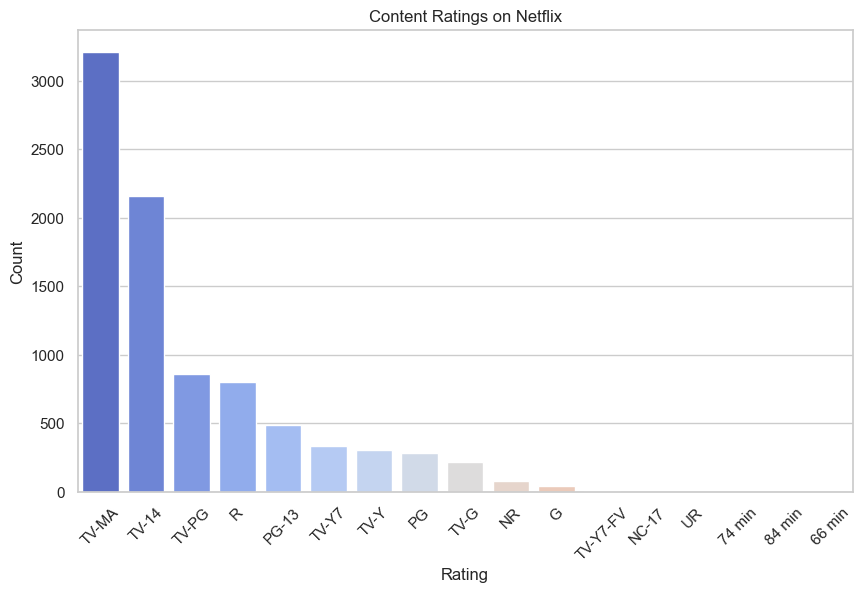

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [9]:
# 統計不同評級的節目數量
rating_counts = netflix_data['rating'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values,palette="coolwarm")
plt.title('Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

rating_counts


## 假說設計

為豐富本報告的內容，我們根據日常生活中的觀察設計了三個假說，目的在於探究Netflix的內容和趨勢。接下來，我們將逐一介紹這些假說及其驗證過程。

### 1. 一年之中在7-8月以及11-12月這兩段時間的電影發布數量是否比較多？

這個想法來自於我們常聽到「暑期強檔」和「年末強檔」的廣告宣傳。為了驗證這一假說，我們將把Netflix電影的發布日期數據製作成圖表，以直觀地觀察在這兩個特定時段是否的確有更多影片發布。

/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/1570341967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['date_added'] = pd.to_datetime(movies_data['date_added'], errors='coerce')
/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/1570341967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['month_added'] = movies_data['date_added'].dt.month


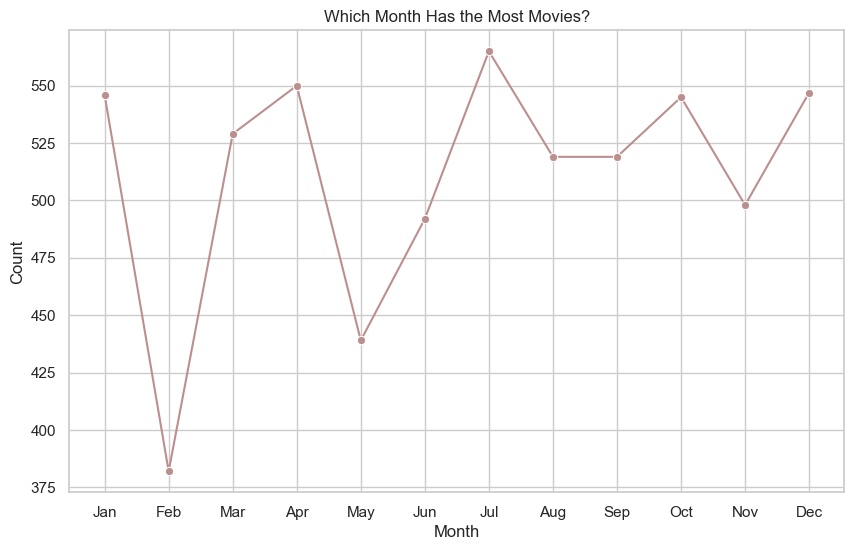

month_added
1     546
2     382
3     529
4     550
5     439
6     492
7     565
8     519
9     519
10    545
11    498
12    547
Name: count, dtype: int64

In [10]:
# 篩選出類型為 'Movie' 的數據
movies_data = netflix_data[netflix_data['type'] == 'Movie']

# 將 date_added 轉換為 datetime 並提取月份
movies_data['date_added'] = pd.to_datetime(movies_data['date_added'], errors='coerce')
movies_data['month_added'] = movies_data['date_added'].dt.month

# 按月份統計電影數量
monthly_movies_count = movies_data['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_movies_count.index, y=monthly_movies_count.values, marker='o',color="#bc8f8f")
plt.title('Which Month Has the Most Movies?')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct","Nov","Dec"])
plt.show()

monthly_movies_count


/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/1972837701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['year_added'] = movies_data['date_added'].dt.year


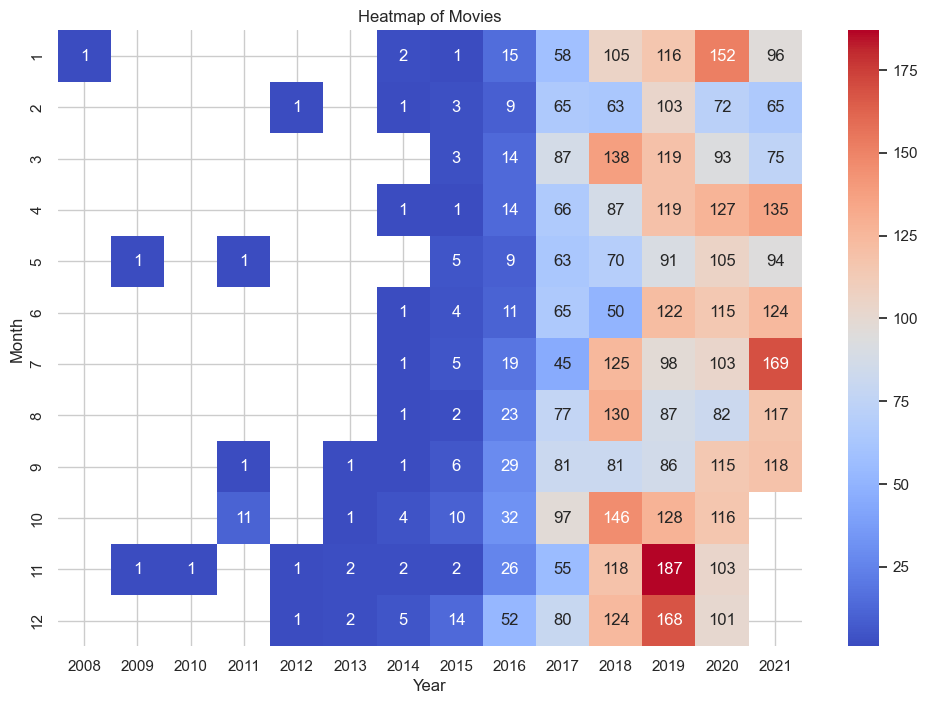

In [11]:

movies_data['year_added'] = movies_data['date_added'].dt.year

#以年份為行、月份為列的數據表
heatmap_data = movies_data.pivot_table(values='show_id', index='month_added', columns='year_added', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.title('Heatmap of Movies')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


### 2. 電影的平均時長是否隨年代增加而越來越長？

自從幾年前的漫威電影--終局之戰出現後，我們發現有許多電影時常似乎越來越長，例如蝙蝠俠、跟最近很紅的奧本海默都是接近或是超過3小時的長片，所以我們猜測電影在近年來有越做越長的趨勢。以下我們會先以兩張圖來說明電影及電視劇的平均長度。

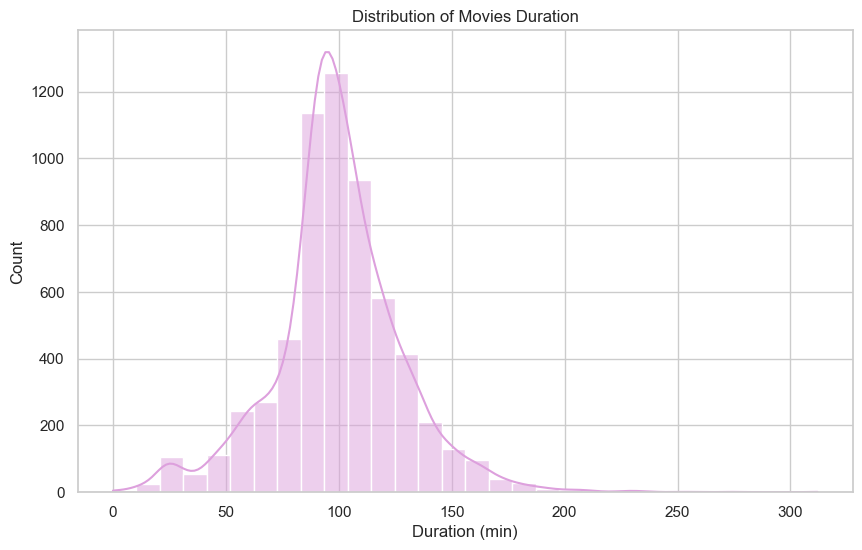

In [12]:
import numpy as np


movies_duration = netflix_data[netflix_data['type'] == 'Movie']['duration']
# 處理電影時長數據，轉換為數字
movies_duration = movies_duration.str.replace('min','').astype(int)




plt.figure(figsize=(10, 6))
sns.histplot(movies_duration, bins=30, kde=True,color="#dda0dd")
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()




/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/694484620.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tv_shows_duration[0], palette="Oranges")


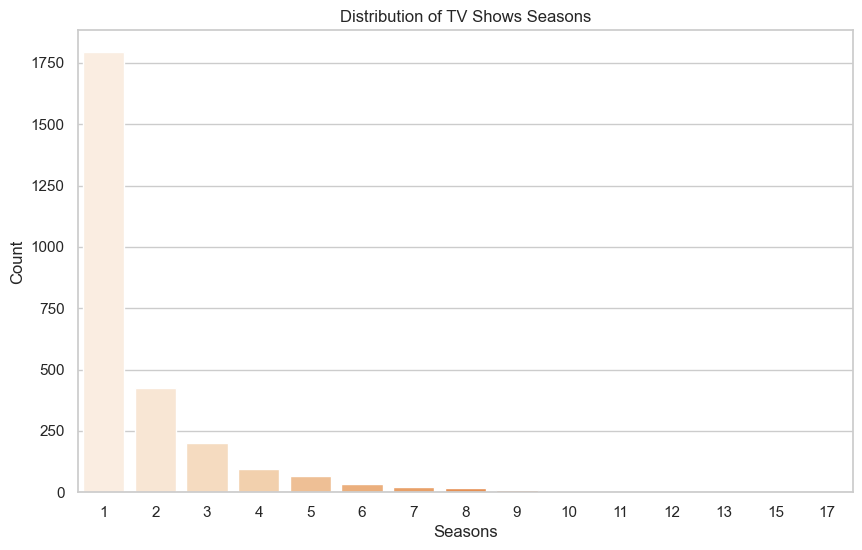

In [13]:
import numpy as np




tv_shows_duration = netflix_data[netflix_data['type'] == 'TV Show']['duration']
#處理電視劇季數數據，轉換為數字
tv_shows_duration = tv_shows_duration.str.extract('(\d+)').astype(int)





plt.figure(figsize=(10, 6))
sns.countplot(x=tv_shows_duration[0], palette="Oranges")
plt.title('Distribution of TV Shows Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()


/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/3329220358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(int)


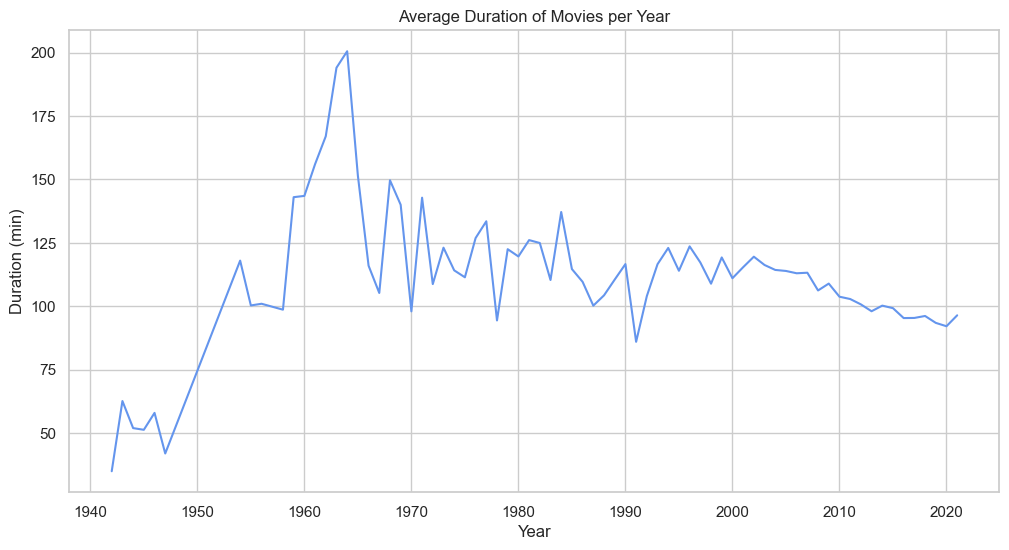

In [14]:

movies_data = netflix_data[netflix_data['type'] == 'Movie']
#處理時長數據，轉換為數字
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(int)
#計算每個年份的電影平均時長
average_duration_per_year = movies_data.groupby('release_year')['duration'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration_per_year, color="#6495ed")
plt.title('Average Duration of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Duration (min)')
plt.show()



/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/2080675356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_type["listed_in"] = movies_data_type["listed_in"].str.split(", ")


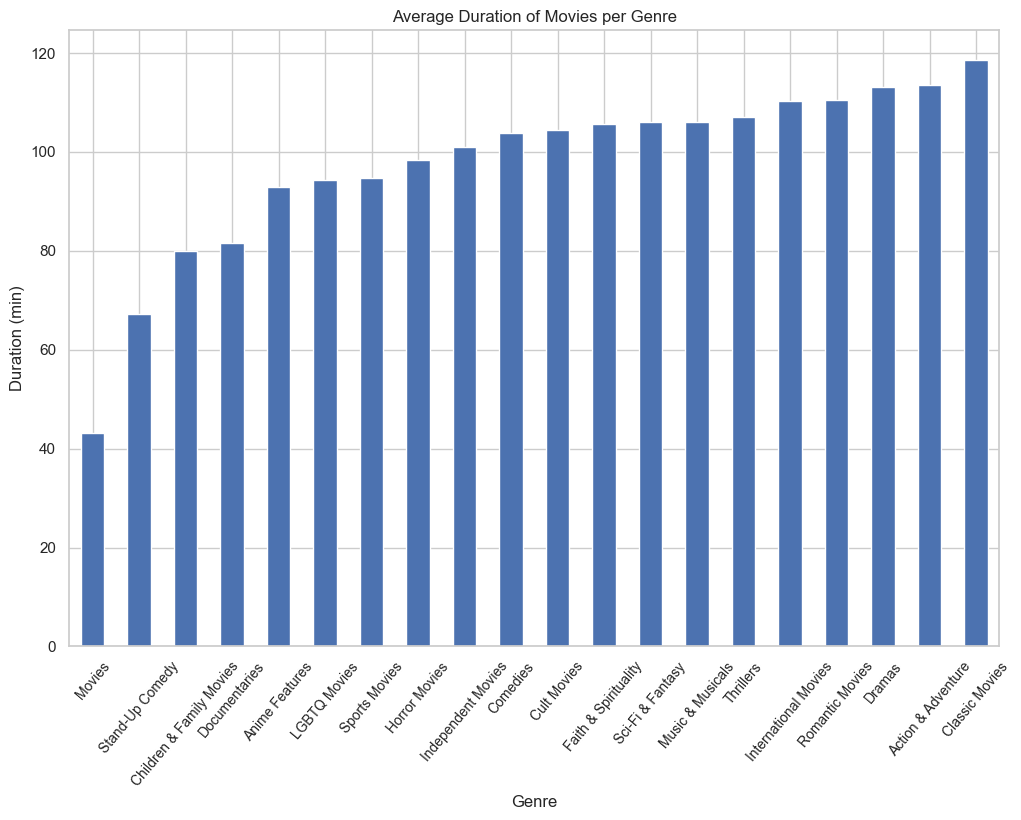

In [16]:
movies_data_type= movies_data[["duration","listed_in"]]
movies_data_type["listed_in"] = movies_data_type["listed_in"].str.split(", ")
movies_data_type = movies_data_type.explode("listed_in")

#計算每個類型的平均時長
average_duration_per_genre = movies_data_type.groupby('listed_in')['duration'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
average_duration_per_genre.plot(kind='bar')
plt.title('Average Duration of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (min)')
plt.xticks(rotation=50, fontsize=10)
plt.show()

### 3. 國家出產影片數量的趨勢，尤其以出產影片量前五名的國家為主，是否有符合總數量的趨勢？

由下圖可見，Netflix在2016年經歷了顯著的影片數量成長。基於這個觀察，我們想了解這些國家的影片生產數量是否與整體趨勢相符。

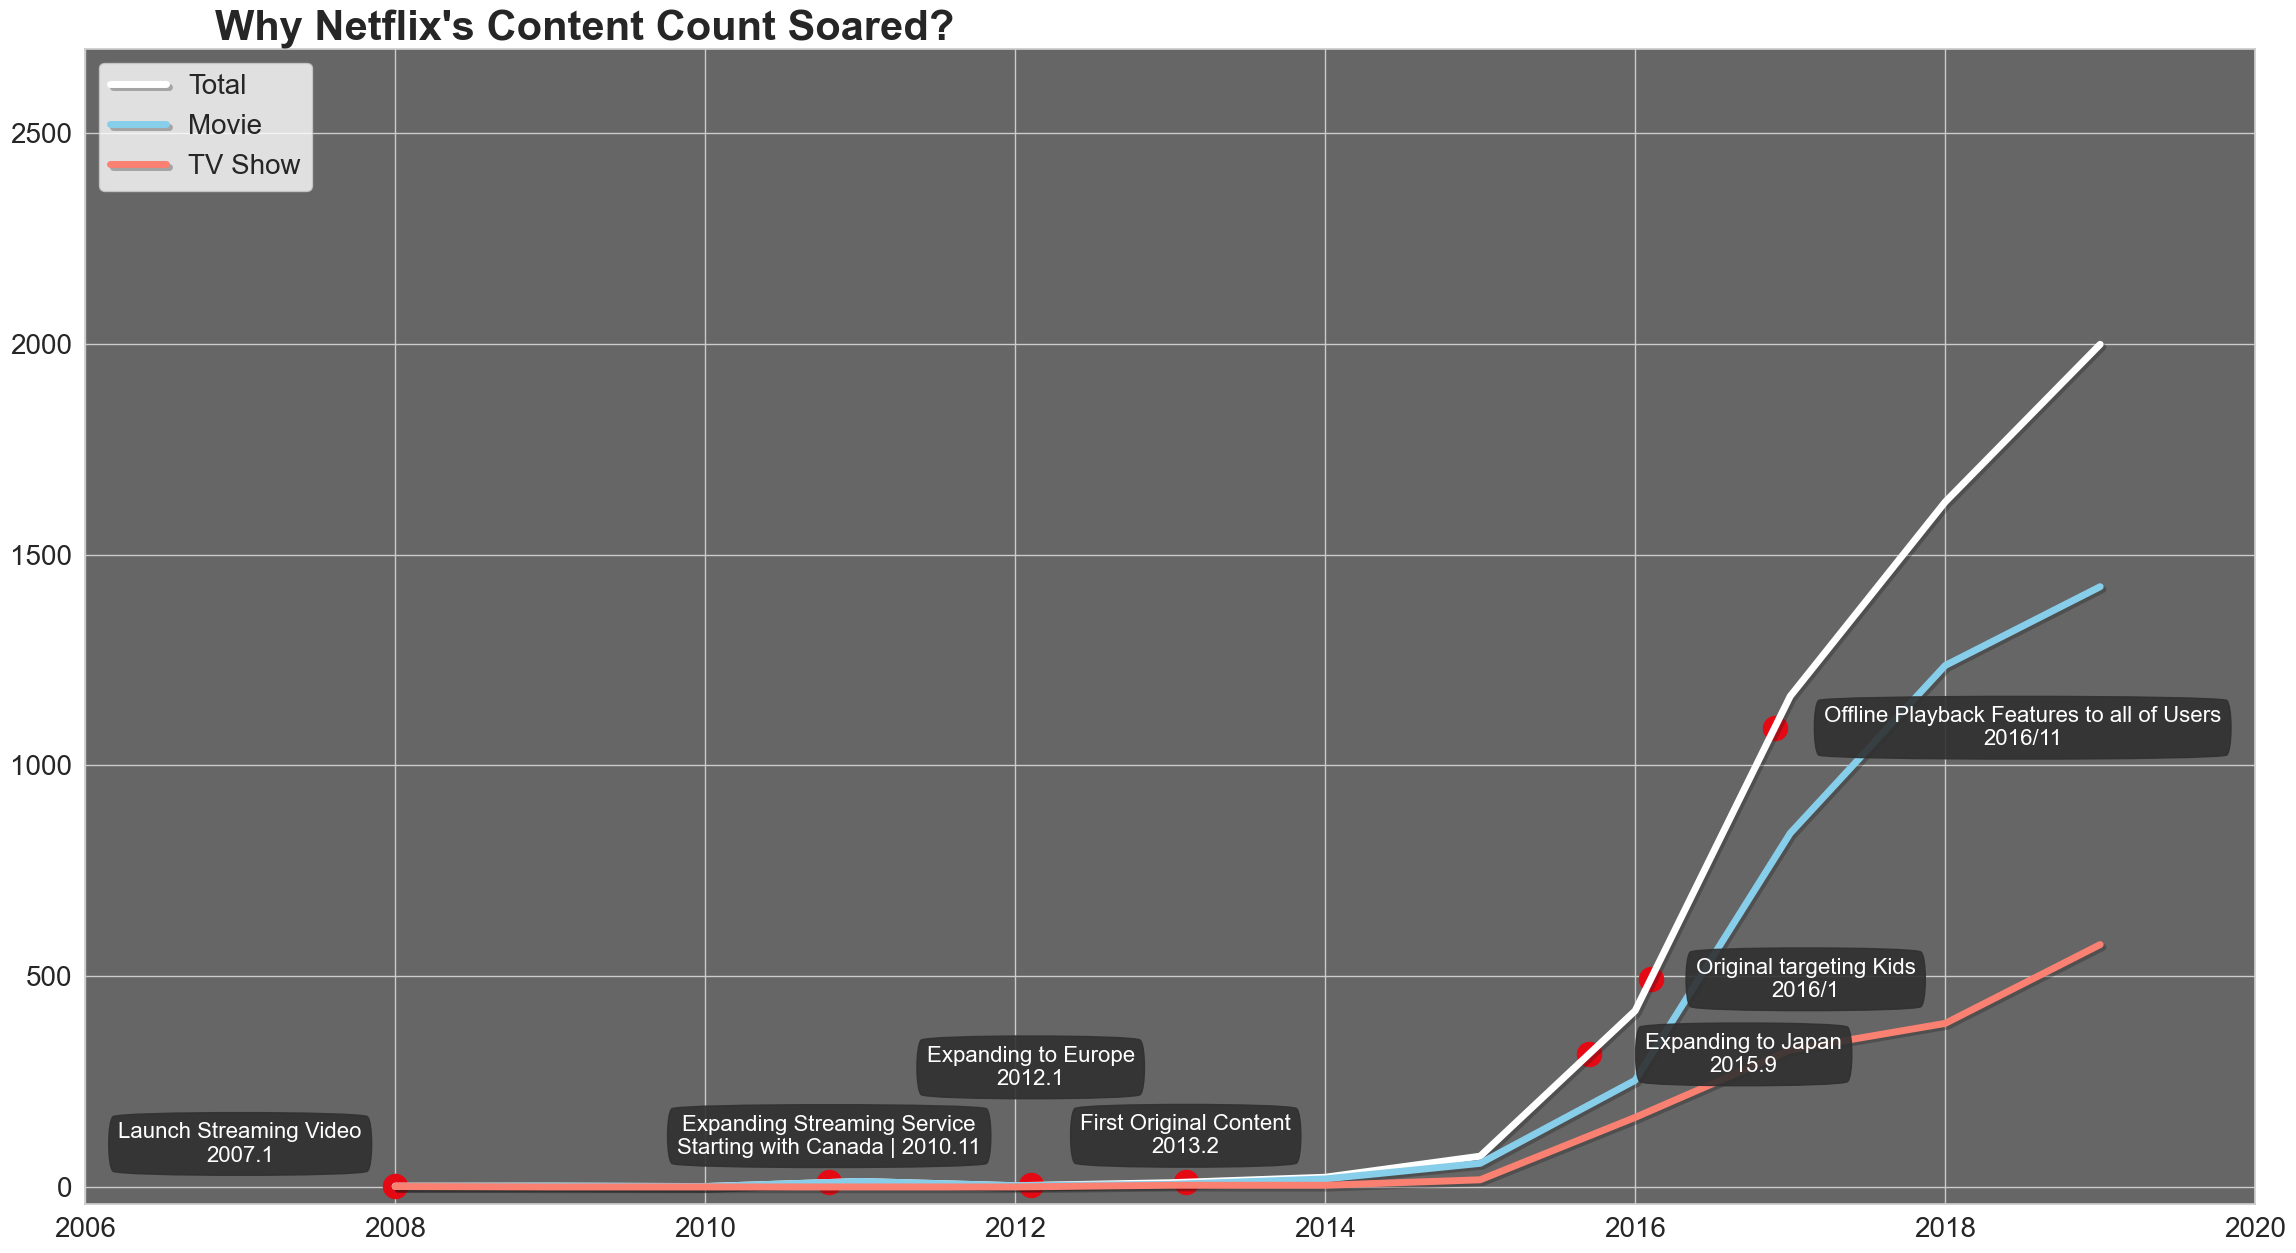

In [18]:

import matplotlib.patheffects as path_effects

# 提取年份
netflix_data['year_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce').dt.year
# 確保年份不是 NaN
netflix_data= netflix_data.dropna(subset=['year_added'])
netflix_data['year_added'] = netflix_data['year_added'].astype(int)

year_data = netflix_data['year_added'].value_counts().sort_index().loc[:2019]
type_data = netflix_data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

#添加重要事件標記
t = [2008, 2010.8, 2012.1, 2013.1, 2015.7, 2016.1, 2016.9]
events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Canada | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]
up_down = [100, 110, 280, 110, 0, 0, 0]
left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)


ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Content Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()


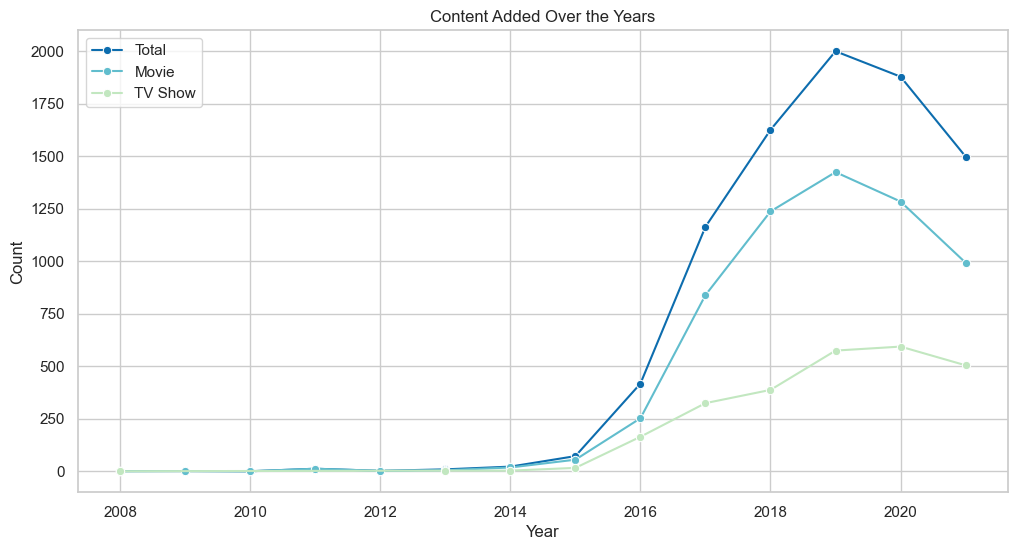

In [19]:

#獲取年份
netflix_data['added_year'] = pd.to_datetime(netflix_data['date_added'], errors='coerce').dt.year

#分組計算每年新增的總數、電影數和電視節目數
total_by_year = netflix_data.groupby('added_year').size()
movies_by_year = netflix_data[netflix_data['type'] == 'Movie'].groupby('added_year').size()
tvshows_by_year = netflix_data[netflix_data['type'] == 'TV Show'].groupby('added_year').size()


current_palette = sns.color_palette("GnBu")
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_by_year, label='Total', marker='o', color=current_palette[5])
sns.lineplot(data=movies_by_year, label='Movie', marker='o', color=current_palette[3])
sns.lineplot(data=tvshows_by_year, label='TV Show', marker='o', color=current_palette[1])

plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/3685932714.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="rainbow_r")


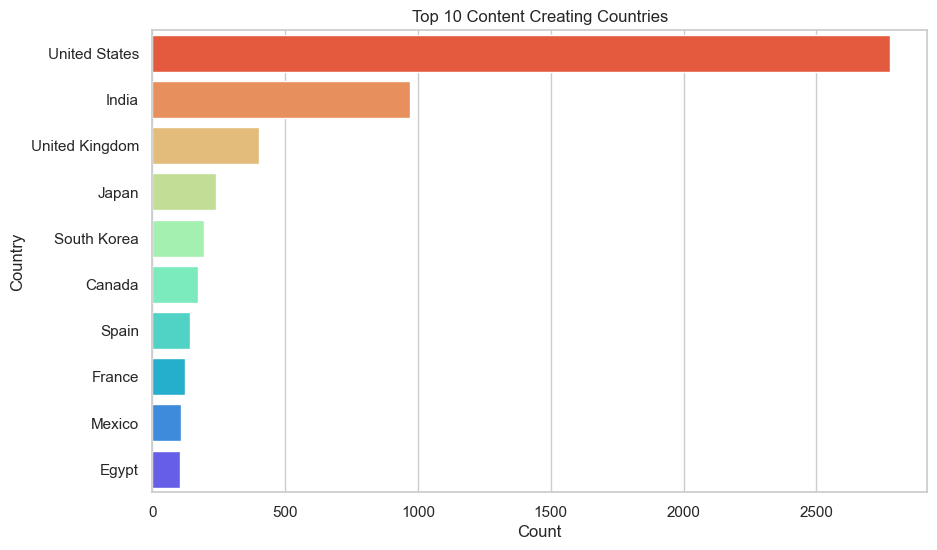

In [20]:
# 將 'Unknown' 替換為 NaN，然後移除這些行
netflix_data['country'] = netflix_data['country'].replace('Unknown', pd.NA)
netflix_data.dropna(subset=['country'], inplace=True)

country_counts = netflix_data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="rainbow_r")
plt.title('Top 10 Content Creating Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

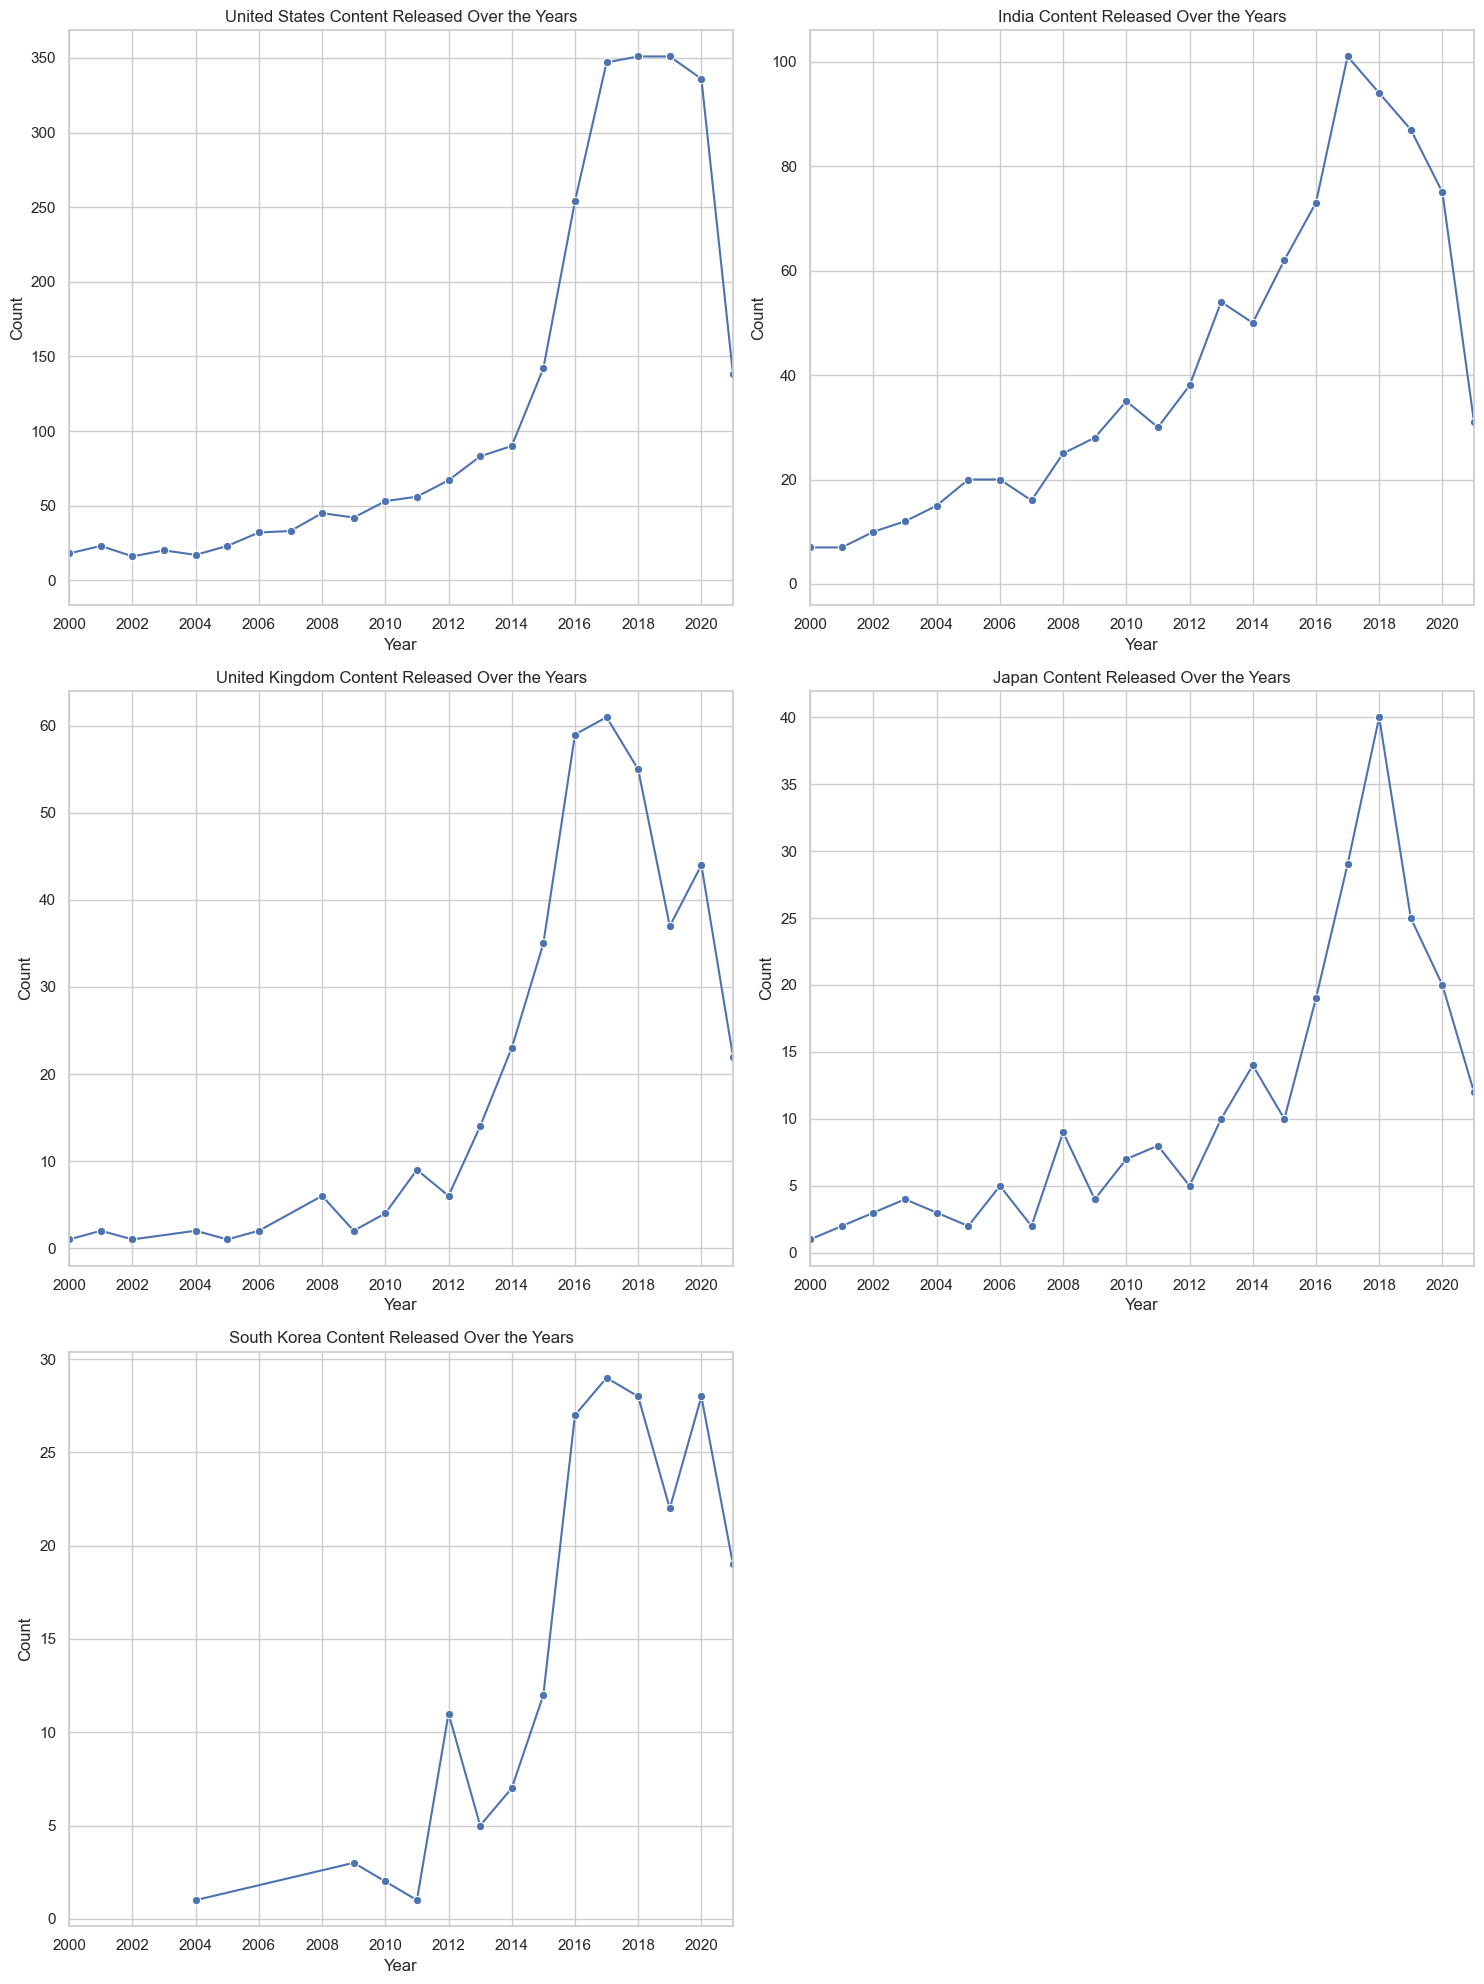

In [21]:
#確定前五個製作節目最多的國家
top_five_countries = netflix_data['country'].value_counts().head(5).index.tolist()


top_countries_data = netflix_data[netflix_data['country'].isin(top_five_countries)]


plt.figure(figsize=(15, 20))


for i, country in enumerate(top_five_countries, 1):
    plt.subplot(3, 2, i)
    country_data = top_countries_data[top_countries_data['country'] == country]
    sns.lineplot(data=country_data.groupby('release_year').size(), marker='o')
    plt.title(f'{country} Content Released Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xlim(2000, country_data['release_year'].max())  # 設定 x 軸範圍
    plt.xticks(range(2000, int(country_data['release_year'].max()) + 1, 2))  # 每兩年顯示一個刻度

plt.tight_layout()
plt.show()


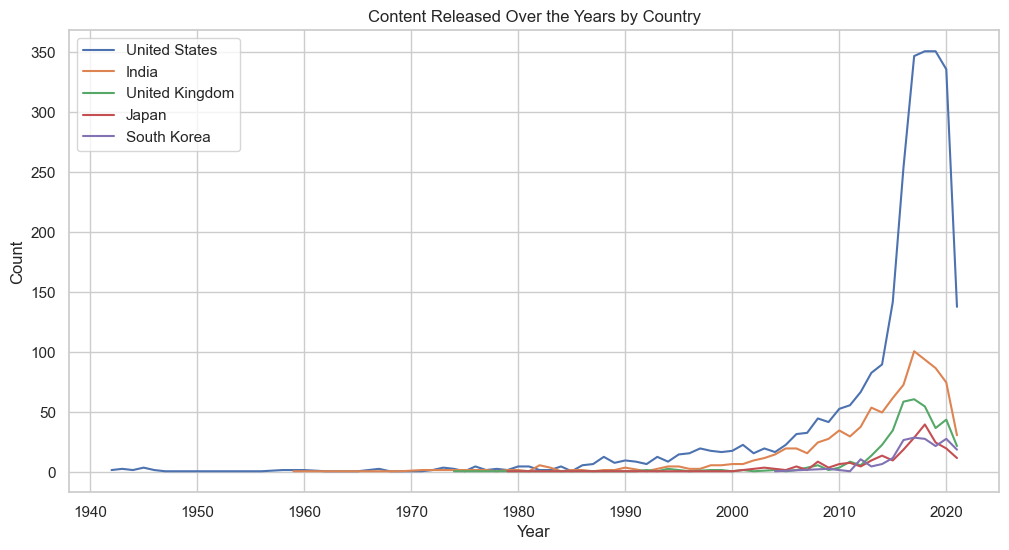

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_five_countries = netflix_data['country'].value_counts().head(5).index.tolist()

top_countries_data = netflix_data[netflix_data['country'].isin(top_five_countries)]


plt.figure(figsize=(12, 6))

#將每個國家繪製在同一張折線圖上
for country in top_five_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    country_year_data = country_data.groupby('release_year').size()
    sns.lineplot(data=country_year_data, label=country)

plt.title('Content Released Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import plotly.express as px
#利用地圖＆熱力圖來呈現
year_country = netflix_data.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

## 補充資訊

電視劇和電影類型文字雲

/var/folders/19/v8y4crs90470978yqyt8dvl80000gn/T/ipykernel_6635/1009404246.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



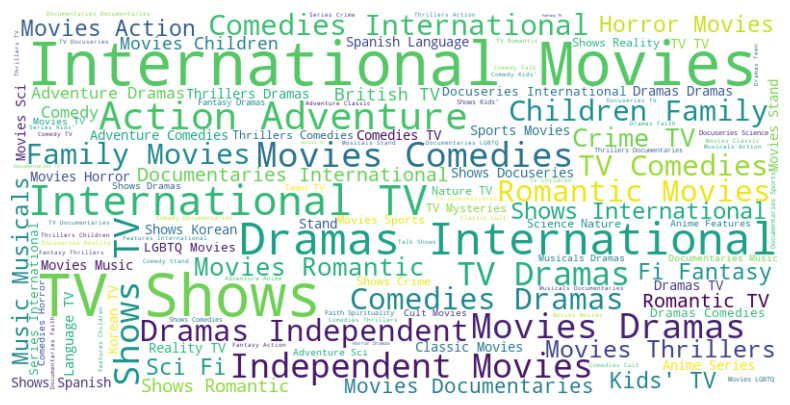

In [28]:
netflix_data2=netflix_data[["show_id","listed_in"]]
netflix_data2["listed_in"] = netflix_data2["listed_in"].str.split(", ")
netflix_data2 = netflix_data2.explode("listed_in")


from wordcloud import WordCloud

all_genres = ' '.join(netflix_data2['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
